# Tarea 3 Mecánica Cuántica 1

### Parte c: Discretización para el dominio con N = 1000 puntos con  $$ -5 \leq x \leq 5$$

In [31]:
import numpy as np
from matplotlib import pyplot as plt
X = np.linspace(-5,5,10000)
print(X)

print(X[1]-X[0])

[-5.        -4.9989999 -4.9979998 ...  4.9979998  4.9989999  5.       ]
0.0010001000100006152


Como podemos ver, el valor de nuestro h resulta siendo de 0.01, por lo que podemos decir que nuestro dominio se encuentra discretizado en 1000 puntos.

### Parte d: Defina una función que calcule el potencial para cada $x_i$ de la discretización.

Sabemos que para cada $x_i$ de la discretización, el potencial se calcula como: $$V_{terorica}(x_i) = \frac{1}{2}x_i^2$$  


In [32]:


def V(x):
    return 0.5*x**2

print(V(X))

[12.5      12.495    12.490001 ... 12.490001 12.495    12.5     ]


### Parte e: Defina una funcion (metodo de Numerov) que tenga como parametros la discretizacion y un valor de energıa especıfico

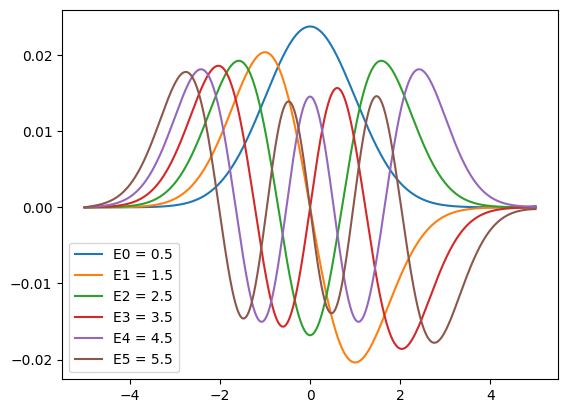

In [35]:
def Numerov(X, E):
    h = X[1]-X[0]
    Y = np.zeros(len(X))
    Y[0] = 0
    Y[1] = 1*10**(-5)	
    for i in range(2,len(X)):
        num1 = 2*(1+((5/12)*(h**2)*2*((V(X[i]))-(E))))*Y[i-1]
        num2 = (1-(1/12)*(h**2)*2*((V(X[i-2]))-(E)))*Y[i-2]
        denom = 1-(1/12)*(h**2)*2*((V(X[i]))-(E))
        Y[i] = (num1-num2)/denom
    #Normalizar
    Y = Y/np.sqrt(np.sum(Y**2))
    return Y



Y1 = Numerov(X, 0.5)
Y2 = Numerov(X, 1.5)
Y3 = Numerov(X, 2.5)
Y4 = Numerov(X, 3.5)
Y5 = Numerov(X, 4.5)
Y = Numerov(X, 5.5)

plt.plot(X,Y1, label = "E0 = 0.5")
plt.plot(X,Y2, label = "E1 = 1.5")
plt.plot(X,Y3, label = "E2 = 2.5")
plt.plot(X,Y4, label = "E3 = 3.5")
plt.plot(X,Y5, label = "E4 = 4.5")
plt.plot(X,Y, label = "E5 = 5.5")
plt.legend()
plt.show()
